# LISTA 4

Problema

$
\text{min} \quad x_2\\
\text{s.a.:} \\
\quad\quad        x_1 \leq 0 \\
\quad\quad        -x_2 \leq 0 \\
\quad\quad        x^2_1 x_x \leq 0 \\
\quad\quad        x^3_1 x_x \leq 0
$

# 1. Gráficos das restrições

## Bibliotecas

In [140]:
from numpy import *
from numpy.linalg import *
from matplotlib.pyplot import *
from matplotlib.collections import *

## Funções de desigualdade

In [152]:
def h_1(X):
    return X[0]
def h_2(X):
    return -X[1]
def h_3(X):
    return X[0]**2 * X[1]
def h_4(X):
    return X[0]**3 * X[1]

## 1.a Encontrar a região viável

A região viável $\Omega$ é a região onde todas as restrições são satisfeitas $$\Omega:=\{ X : h_1(X) \leq 0 \cap h_2(X) \leq 0 \cap h_3(X) \leq 0 \cap h_4(X) \leq 0 \}$$

In [142]:
def h_inters(X): # Intersection
    h1 = h_1(X)
    h2 = h_2(X)
    h3 = h_3(X)
    h4 = h_4(X)
    if h1 <= 0 and h2 <= 0 and h3 <= 0 and h4 <= 0:
        return True
    return False

Desta forma, o resultado encontrado está apresentado na célula abaixo (os resultados foram obtidos antes de forma analítica).

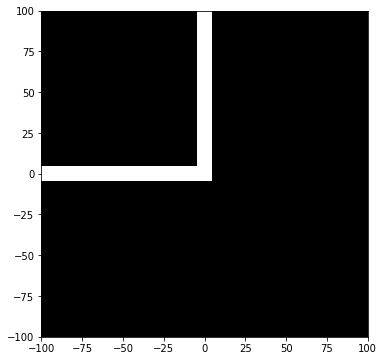

In [143]:
im_range = 100.0
im_step = 1.0

def get_viable_region_matrix(h):
    x_1_list = arange(-im_range, im_range + 0.1, 1)
    x_2_list = arange(-im_range, im_range + 0.1, 1)
    X_1, X_2 = meshgrid(x_1_list, x_2_list)
    H_list = zeros(X_1.shape)
    for i in range(X_1.shape[0]):
        for j in range(X_2.shape[1]):
            X = array([
                [X_1[i,j]],
                [X_2[i,j]]
            ])
            H_list[i,j] = h(X)
    return H_list

def plot_constraints(H_list):
    fig = figure(figsize=(6,6))
    imshow(
        H_list, interpolation='none', origin='lower', 
        cmap=cm.gray, extent=(-im_range, im_range, -im_range, im_range)
    )
    
H_inters_list = get_constraint_region_matrix(h_inters)
plot_constraints(H_inters_list)

A região viável está em 

$
\Omega = \{ X : (x_1 = 0 \cap  x_2 \geq 0) \cup (x_2 = 0 \cap  x_1 \leq 0)\}
$

# 2. Encontrar o conjunto de otimizadores $\Omega^*=\{X^*\}$

## 2.a. Condições de Karush-Kuhn-Tucker (KKT)

O ponto ótimo deve respeitas as condições:

1. $\nabla f(X^*)=-\sum_{i=1}^{4}{\nabla h_i(X^*) \mu_i}$
2. $ h_i(X^*) \mu_i = 0$
3. $ \mu_i \geq 0 $

## 2.b. Condição 1

**Cálculo dos gradientes**

$\nabla f(X) = \begin{bmatrix}
0\\
1
\end{bmatrix}$,
$\nabla h_1(X) = \begin{bmatrix}
1\\
0
\end{bmatrix}$, 
$\nabla h_2(X) = \begin{bmatrix}
0\\
-1
\end{bmatrix}$,
$\nabla h_3(X) = \begin{bmatrix}
2 x_1 x_2\\
x_1^2
\end{bmatrix}$,
$\nabla h_4(X) = \begin{bmatrix}
3 x_1^2 x_2\\
x_1^3
\end{bmatrix}$


**Aplicação na condição 1**

$
\begin{bmatrix}
    0\\
    1
\end{bmatrix}=- \begin{pmatrix}
\begin{bmatrix}
    1\\
    0
\end{bmatrix}\mu_1+
\begin{bmatrix}
    0\\
    -1
\end{bmatrix}\mu_2+
\begin{bmatrix}
    2 x_1 x_2\\
    x_1^2
\end{bmatrix}\mu_3+
\begin{bmatrix}
    3 x_1^2 x_2\\
    x_1^3
\end{bmatrix}\mu_4
\end{pmatrix}
$

**O que leva ao sistema de equações:**
\begin{matrix}
\text{Eq. 2.b.1} & 1\mu_1 & + & 0\mu_2 & + & 2x_1 x_2\mu_3  & + & 3 x_1^2 x_2 \mu_4 & = & 0\\ 
\text{Eq. 2.b.2} & 0\mu_1 & + & -1\mu_2 & + & x_1^2\mu_3 & + & x_1^3\mu_4 & = & -1
\end{matrix}

**Se dividirmos o conjunto viável em dois, temos**
1. $\Omega_1 = \{ X : x_1=0 \cap x_2 \geq 0 \}$
2. $\Omega_2 = \{ X : x_1\leq 0 \cap x_2 = 0 \}$

**Da Equação 2.b.1**, temos que $\mu_1=0$, visto que ou $x_1 = 0$ ou $x_2 = 0$

**Desta forma, resta a equação 2.b.2**

**2.b.2:** $
-1\mu_2 +x_1^2\mu_3 + x_1^3\mu_4 = -1
$

## 2.c. Condição  2

$
\text{a.} \quad x_1 \mu_1 = 0 \\
\text{b.} \quad - x_2 \mu_2 = 0  \\
\text{c.} \quad x_1^2 x_2 \mu_3 = 0 \\
\text{d.} \quad x_1^3 x_2 \mu_4 = 0 \\
$

* A equação **a** é sempre satisfeita, visto que $\mu_1 = 0$, $\forall x_1 \in \mathbb{R}$.
* As equações **c** e **d** são sempre satisfeitas, visto que $x_1=0$ ou $x_2=0$, $\forall \mu_3, \mu_4 \in \mathbb{R}$
* Cabe prosseguir com **b**

**A equação b. da condição 2 (Equação 2.c.b)** pode ser usada em conjunto da **Equação 2.b.2**, tal que:

* $-1\mu_2 +x_1^2\mu_3 + x_1^3\mu_4 = -1$
    * $\mu_2 = x_1^2\mu_3 + x_1^3\mu_4 +1$
* **Na Equação 2.c.b:** $-x_2( x_1^2\mu_3 + x_1^3\mu_4 +1) = 0$, 
    * Isto leva a $x_2=0$
    
Logo, sabemos que os pontos que minimizam o problema estão contidos no conjunto viável $\Omega_2$, ou seja, $x_1 \leq 0$ e $x_2=0$ 

## 2.d Condição 3
Ainda resta provar que $\mu_i \geq 0$, $i=1,2,3,4$. Pela condição 1, sabemos que $\mu_1 = 0$ e pela condição 2 temos que $\mu_3,\mu_4 \in \mathbb{R}$. Com a condição 3, temos que $\mu_3,\mu_4 \geq 0$. Logo, precisamos que $\mu_2 \geq 0$. Assim

$
\mu_2 = x_1^2 \mu_3 + x_1^3 \mu_4 + 1 \geq 0
$

Com um pouco de manipulação, chegamos a

$
\mu_3 + x_1 \mu_4 \geq \frac{-1}{x_1^2}
$

Como $\frac{-1}{x_1^2} \leq 0$, então

$
\mu_3 + x_1 \mu_4 \geq 0 \Rightarrow x_1 \geq \frac{-\mu_3}{\mu_4}
$

Como $\frac{-\mu_3}{\mu_4} \leq 0$, então

$
x_1 \geq 0
$

Sabemos que $X \in \Omega_2$, portanto, para existir, $x_1=0$. De fato, se $x_1 = 0$, temos que $\mu_2=1\geq 0$.

Portanto, o minimizador $X^*$ de $f(X)$ é o ponto $X^*=(0,0)$.

## Dúvida
A partir do momento que definimos que a solução estava contida em $\Omega_2$, temos que $f(x)=x_2=0$. Isto não deveria ser o suficiente para definir que $\{X^*\}$ na verdade é o conjunto $\Omega_2$? Afinal, independente de $x_1$, $f(X)$ terá o mesmo valor. Onde parar esta questão?

# 3. Implementar o problema

In [159]:
from scipy.optimize import *

ineq_cons = []
ineq_cons.append({'type': 'ineq',
              'fun' : h_1,
              'jac' : lambda X: np.array([[1.0,
                                          0.0]])})
ineq_cons.append({'type': 'ineq',
              'fun' : h_2,
              'jac' : lambda X: np.array([[0.0,
                                          -1.0]])})
ineq_cons.append({'type': 'ineq',
              'fun' : h_3,
              'jac' : lambda X: np.array([[2.*X[0]*X[1],
                                            X[0]**2]])})
ineq_cons.append({'type': 'ineq',
              'fun' : h_4,
              'jac' : lambda X: np.array([[3.*(X[0]**2)*X[1],
                                            X[0]**3]])})

def f(X):
    return X[1]

def gen_init_points():
    list_pts = []
    x_1_list = arange(-150, 150 + 0.1, 10)
    x_2_list = arange(-150, 150 + 0.1, 10)
    for idx1 in range(x_1_list.shape[0]):
        for idx2 in range(x_2_list.shape[0]):
            list_pts.append([ [x_1_list[idx1]], [x_2_list[idx2]] ])
    return list_pts

list_pts = gen_init_points()
list_sol = []
for X_init in list_pts:
    sol = minimize(f, X_init, constraints=ineq_cons)
    list_sol.append(sol["x"])

print(where( norm(sol) < 1e-5))
    

TypeError: unsupported operand type(s) for *: 'OptimizeResult' and 'OptimizeResult'